In [25]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import StratifiedKFold
import seaborn as sns;
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn import tree
import time
from sklearn import metrics
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import NearMiss
from imblearn.pipeline import Pipeline

def stdscaler(df):
    scaler = StandardScaler()
    scaler.fit(df)
    scX_df = scaler.transform(df)
    df=pd.DataFrame(scX_df, index =df.index,columns =df.columns  )
    return df
def kfoldtest(kfoldn,model,Xtrain_df,ytrain_df):
    kf=StratifiedKFold(n_splits=kfoldn)
    accu=[]
    auc=[]
    f1 =[]
    aab =[]
    dcd = []
    tim = []
    kf.get_n_splits(Xtrain_df,ytrain_df)
    
    for train_index, test_index in kf.split(Xtrain_df,ytrain_df):
        #print("TRAIN:", len(train_index), "TEST:", len(test_index))
        t1 =time.time()
        X_train, X_test = Xtrain_df.iloc[train_index], Xtrain_df.iloc[test_index]
        y_train, y_test = ytrain_df.iloc[train_index], ytrain_df.iloc[test_index]
        
        """
        if samplechoice == "SMOTE":
            smt = SMOTE()
            X_train,  y_train = smt.fit_sample(X_train , y_train)
        elif samplechoice == "NearMiss":
            nr = NearMiss()
            X_train,  y_train = nr.fit_sample(X_train , y_train)
        """    
    
        model.fit(X_train,y_train)
        try:
            accu.append(model.score(X_test,y_test))
        except:
            print("This model have no build-in score.")
            
        auc.append(roc_auc_score(y_test,model.predict(X_test)))
        f1.append(f1_score(y_test, model.predict(X_test).astype(int)))
        tim.append(time.time()-t1)
        cm1=confusion_matrix(test_y, clf.predict(test_data),labels = [1,0])
        print("cv result:")
        print(cm1)
        sensitivity1 = cm1[0,0]/(cm1[0,0]+cm1[0,1])
        aab.append(sensitivity1)

        specificity1 = cm1[1,1]/(cm1[1,0]+cm1[1,1])
        dcd.append(specificity1)
    return accu,auc,f1,aab,dcd,tim

def testresult(model,name,Xtrain_df,ytrain_df):
    fpr, tpr, thresholds = metrics.roc_curve(ytrain_df, model.predict_proba(Xtrain_df)[:,1], pos_label=1)
    label =(name+' area='+str(roc_auc_score(ytrain_df, model.predict_proba(Xtrain_df)[:,1]))[:4])
    f1=(f1_score(ytrain_df, model.predict(Xtrain_df).astype(int)))
    accu = model.score(Xtrain_df,ytrain_df)
    print("test result:")
    print(confusion_matrix(ytrain_df, model.predict(Xtrain_df), labels=[1,0]))
    return fpr,tpr,label,f1,accu
sns.set_style("whitegrid")
sns.set(rc={'figure.figsize':(11.7,8.27)})


In [26]:
file_name = 'creditcard 2.csv'
data =pd.read_csv(file_name)
del data['Time']
u=StandardScaler().fit_transform(np.array(data['Amount']).reshape(-1,1))
data['Amount']=pd.Series(u[:,0],index =data.index)
train_y = data['Class'].copy()
train_data =data.drop(columns='Class')

train_data,test_data,train_y,test_y = train_test_split(
    train_data, train_y, test_size=0.20, random_state=42)


In [27]:
testroc_holder=[]
testlabel_holder = []
test_result = []
samplechoice = "NearMiss"

In [28]:
from sklearn.externals import joblib
est_holder = []
for i in range(6):
    u=joblib.load('model{}.pkl'.format(samplechoice+str(i)))
    u.steps.pop(0)              
    est_holder.append(u)
    print(est_holder[i])
    




Pipeline(memory=None,
         steps=[('lr',
                 LogisticRegression(C=0.001, class_weight=None, dual=False,
                                    fit_intercept=True, intercept_scaling=1,
                                    l1_ratio=None, max_iter=3000,
                                    multi_class='auto', n_jobs=None,
                                    penalty='l2', random_state=None,
                                    solver='lbfgs', tol=0.0001, verbose=0,
                                    warm_start=False))],
         verbose=False)
Pipeline(memory=None,
         steps=[('mlp',
                 MLPClassifier(activation='relu', alpha=0.0001,
                               batch_size='auto', beta_1=0.9, beta_2=0.999,
                               early_stopping=False, epsilon=1e-08,
                               hidden_layer_sizes=(50, 100, 50),
                               learning_rate='constant',
                               learning_rate_init=0.001, max_fun=1

In [29]:
model = est_holder[0]

fpr,tpr,label,f1,accu=testresult(model,"LogisticRegression",test_data,test_y)

testroc_holder.append([fpr,tpr])
testlabel_holder.append(label)
test_result.append(pd.DataFrame([["LogisticRegression",np.average(accu),
                       np.average(f1)]],
                     columns=["model names",'CVaccuracy','CVF1']))


test result:
[[   79    19]
 [  116 56748]]


In [30]:
model = est_holder[1]

fpr,tpr,label,f1,accu=testresult(model,"MLP",test_data,test_y)

testroc_holder.append([fpr,tpr])
testlabel_holder.append(label)
test_result.append(pd.DataFrame([["MLP",np.average(accu),
                       np.average(f1)]],
                     columns=["model names",'CVaccuracy','CVF1']))

test result:
[[   96     2]
 [33525 23339]]


In [31]:
model = est_holder[2]

fpr,tpr,label,f1,accu=testresult(model,"DecisionTree",test_data,test_y)

testroc_holder.append([fpr,tpr])
testlabel_holder.append(label)
test_result.append(pd.DataFrame([["DecisionTree",np.average(accu),
                       np.average(f1)]],
                     columns=["model names",'CVaccuracy','CVF1']))

test result:
[[   92     6]
 [30129 26735]]


In [32]:
model =est_holder[3]

fpr,tpr,label,f1,accu=testresult(model,"GradientBoosting",test_data,test_y)

testroc_holder.append([fpr,tpr])
testlabel_holder.append(label)
test_result.append(pd.DataFrame([["GradientBoosting",np.average(accu),
                       np.average(f1)]],
                     columns=["model names",'CVaccuracy','CVF1']))

test result:
[[   98     0]
 [38458 18406]]


In [33]:
model = est_holder[4]

fpr,tpr,label,f1,accu=testresult(model,"RandomForest",test_data,test_y)

testroc_holder.append([fpr,tpr])
testlabel_holder.append(label)
test_result.append(pd.DataFrame([["RandomForest",np.average(accu),
                       np.average(f1)]],
                     columns=["model names",'CVaccuracy','CVF1']))

test result:
[[   95     3]
 [34556 22308]]


In [34]:
model = est_holder[5]


fpr,tpr,label,f1,accu=testresult(model,"MajorVoting",test_data,test_y)

testroc_holder.append([fpr,tpr])
testlabel_holder.append(label)
test_result.append(pd.DataFrame([["MajorVoting",np.average(accu),
                       np.average(f1)]],
                     columns=["model names",'CVaccuracy','CVF1']))

test result:
[[   92     6]
 [15452 41412]]


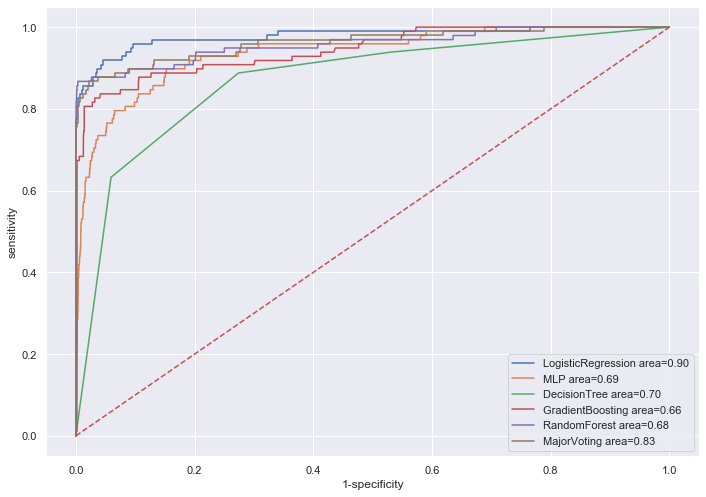

In [35]:


plt.figure(figsize=(11.7,8.27))
for i in range(len(testroc_holder)):
    fpr, tpr =testroc_holder[i][0],testroc_holder[i][1]
    plt.plot(fpr, tpr,label=testlabel_holder[i])
    
plt.plot([0,1],[0,1],"--",color ='r')
plt.xlabel('1-specificity')
plt.ylabel('sensitivity')
plt.legend()

plt.savefig('ruc_curve_{}sampling.png'.format(str(samplechoice)))
plt.show()

In [36]:
result= pd.concat(test_result,axis=0)
result.to_csv('test_result_{}sampling.csv'.format(str(samplechoice)))
result

,model names,CVaccuracy,CVF1
0,LogisticRegression,0.997630,0.539249
0,MLP,0.411415,0.005694
0,DecisionTree,0.470963,0.006069
0,GradientBoosting,0.324848,0.005071
0,RandomForest,0.393297,0.005468
0,MajorVoting,0.728626,0.011763
